### Importing necessary libraries

In [314]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Importing the needed dataset

In [316]:
df = pd.read_csv('mall_customers_dataset.csv', delimiter = ';')

In [318]:
df

,Mall_Customers,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
1,1,Male,19,15000,39
2,2,Male,21,15000,81
3,3,Female,20,16000,6
4,4,Female,23,16000,77
...,...,...,...,...,...
196,196,Female,35,120000,79
197,197,Female,45,126000,28
198,198,Male,32,126000,74
199,199,Male,32,137000,18


In [320]:
#Now removing first row since it contains the column names that exist within the columns which names are not suitable
df = df.drop(df.index[0])

In [322]:
#Renaming the columns to the ones that exist in the first row of values within the columns

df.rename(columns = {
          'Mall_Customers': 'customer_ID',
          'Unnamed: 1': 'gender',
          'Unnamed: 2': 'age',
          'Unnamed: 3': 'annual_income_dollar',
          'Unnamed: 4': 'spending_score_1_to_100'
          }, inplace = True)

In [328]:
#Checking if it has been applied
df

,customer_ID,gender,age,annual_income_dollar,spending_score_1_to_100
1,1,Male,19,15000,39
2,2,Male,21,15000,81
3,3,Female,20,16000,6
4,4,Female,23,16000,77
5,5,Female,31,17000,40
...,...,...,...,...,...
196,196,Female,35,120000,79
197,197,Female,45,126000,28
198,198,Male,32,126000,74
199,199,Male,32,137000,18


In [332]:
#Checking if the first row has been changed
print(df.iloc[0])

customer_ID                    1
gender                      Male
age                           19
annual_income_dollar       15000
spending_score_1_to_100       39
Name: 1, dtype: object


In [334]:
#Checking if there are any missing values or not within the dataset
df.isna()

,customer_ID,gender,age,annual_income_dollar,spending_score_1_to_100
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
...,...,...,...,...,...
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False
199,False,False,False,False,False


In [336]:
#Looking if there are any duplicates within the dataset
df.duplicated().sum()

0

In [338]:
#Looking at the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   customer_ID              200 non-null    object
 1   gender                   200 non-null    object
 2   age                      200 non-null    object
 3   annual_income_dollar     200 non-null    object
 4   spending_score_1_to_100  200 non-null    object
dtypes: object(5)
memory usage: 7.9+ KB


In [340]:
#Convert all columns to int because of all columns being an object, which is needed in order to fit the models

In [342]:
#Converting gender to 1 and 0 between male and female
df = pd.get_dummies(df, columns=['gender'], dtype=int)

In [344]:
#Converting columns to datatype int
df['customer_ID'] = df['customer_ID'].astype(int)
df['age'] = df['age'].astype(int)
df['annual_income_dollar'] = df['annual_income_dollar'].astype(int)
df['spending_score_1_to_100'] = df['spending_score_1_to_100'].astype(int)

In [346]:
#Checking if datatype int has been applied to all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_ID              200 non-null    int32
 1   age                      200 non-null    int32
 2   annual_income_dollar     200 non-null    int32
 3   spending_score_1_to_100  200 non-null    int32
 4   gender_Female            200 non-null    int32
 5   gender_Male              200 non-null    int32
dtypes: int32(6)
memory usage: 4.8 KB


In [348]:
df.describe()

,customer_ID,age,annual_income_dollar,spending_score_1_to_100,gender_Female,gender_Male
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60560.000000,50.200000,0.560000,0.440000
std,57.879185,13.969007,26264.721165,25.823522,0.497633,0.497633
min,1.000000,18.000000,15000.000000,1.000000,0.000000,0.000000
25%,50.750000,28.750000,41500.000000,34.750000,0.000000,0.000000
50%,100.500000,36.000000,61500.000000,50.000000,1.000000,0.000000
75%,150.250000,49.000000,78000.000000,73.000000,1.000000,1.000000
max,200.000000,70.000000,137000.000000,99.000000,1.000000,1.000000


In [350]:
#Checking the median for the dataset's columns
df.median()

customer_ID                  100.5
age                           36.0
annual_income_dollar       61500.0
spending_score_1_to_100       50.0
gender_Female                  1.0
gender_Male                    0.0
dtype: float64

# Exploratory Data Analysis

In [352]:
#Importing StandardScaler for scaling the dataset
from sklearn.preprocessing import StandardScaler

In [358]:
stanscal = StandardScaler()

In [ ]:
#Standardizing the dataset

In [360]:
X_SC = df.iloc[:]

In [362]:
X_SC[['annual_income_dollar', 'spending_score_1_to_100']] = stanscal.fit_transform(X_SC[['annual_income_dollar', 'spending_score_1_to_100']])

In [364]:
X_SC.head()

,customer_ID,age,annual_income_dollar,spending_score_1_to_100,gender_Female,gender_Male
1,1,19,-1.738999,-0.434801,0,1
2,2,21,-1.738999,1.195704,0,1
3,3,20,-1.700830,-1.715913,1,0
4,4,23,-1.700830,1.040418,1,0
5,5,31,-1.662660,-0.395980,1,0


In [366]:
#Checking the mean values for age, annual income in dollar, and the spending score that is between 1 and 100
print(f'Mean value for age: {df['age'].mean()}')
print(f'Mean value for annual income in dollar: {df['annual_income_dollar'].mean()}')
print(f'Mean value for spending score between 1 and 100: {df['spending_score_1_to_100'].mean()}')

Mean value for age: 38.85
Mean value for annual income in dollar: 60560.0
Mean value for spending score between 1 and 100: 50.2


<Axes: xlabel='spending_score_1_to_100'>

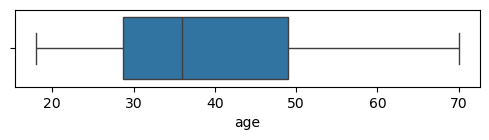

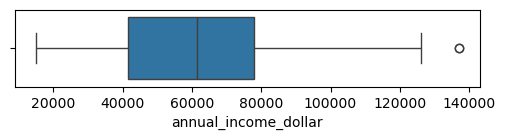

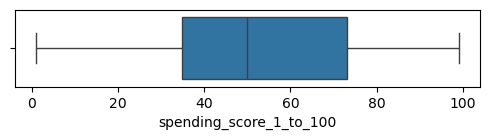

In [368]:
plt.figure(figsize = (6,1))
sns.boxplot(data = df, x = 'age')
plt.figure(figsize = (6,1))
sns.boxplot(data = df, x = 'annual_income_dollar')
plt.figure(figsize = (6,1))
sns.boxplot(data = df, x = 'spending_score_1_to_100')

<Axes: xlabel='annual_income_dollar', ylabel='Count'>

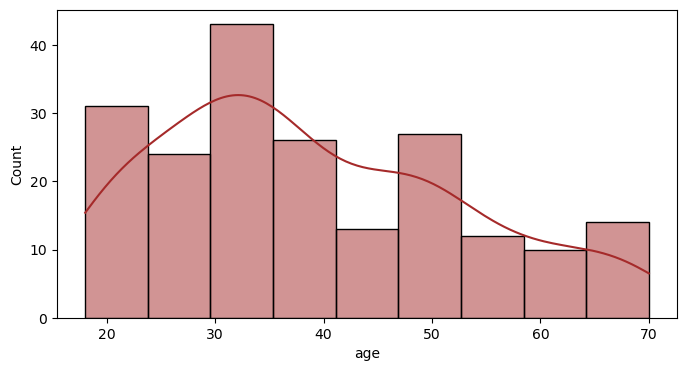

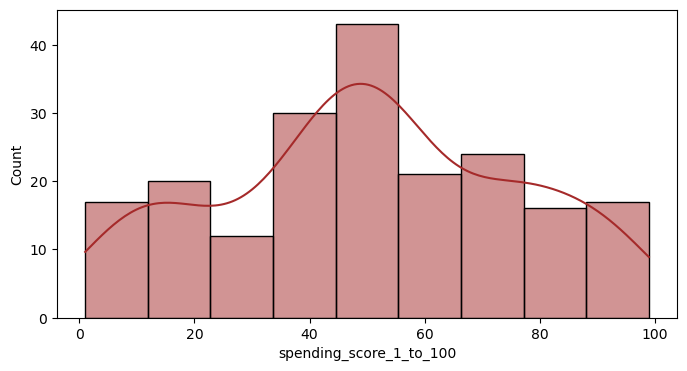

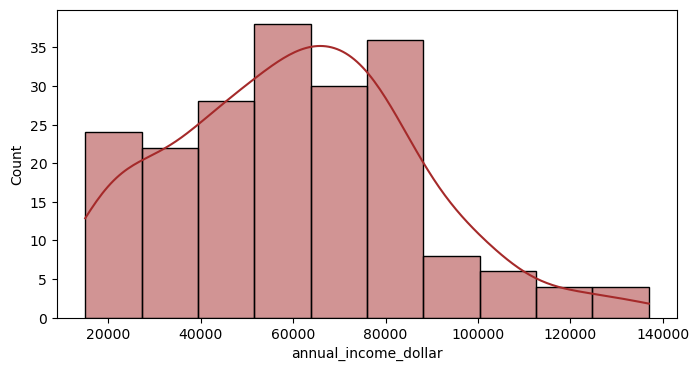

In [374]:
plt.figure(figsize = (8,4))
sns.histplot(data = df, x = 'age', color = 'brown', kde = True)
plt.figure(figsize = (8,4))
sns.histplot(data = df, x = 'spending_score_1_to_100', color = 'brown', kde = True)
plt.figure(figsize = (8,4))
sns.histplot(data = df, x = 'annual_income_dollar', color = 'brown', kde = True)

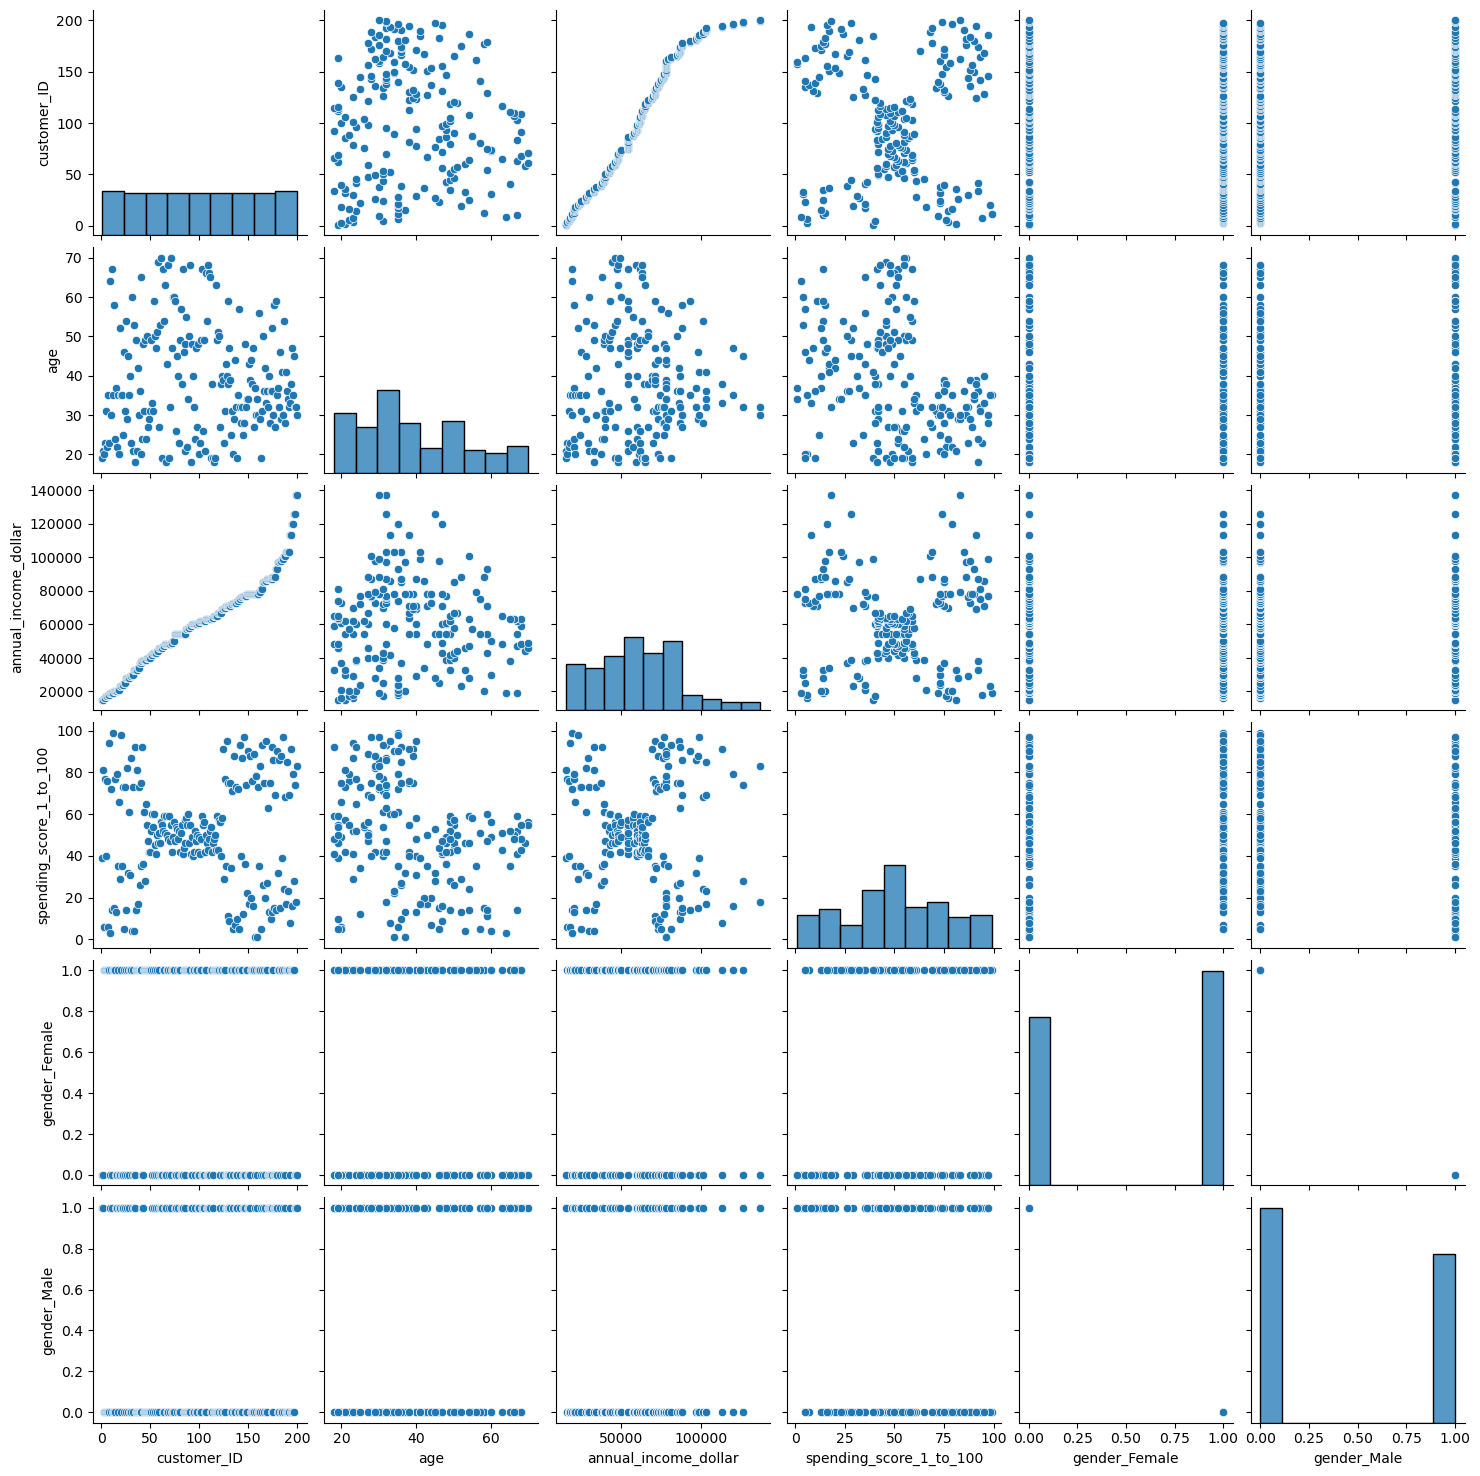

In [376]:
#Looking to find some relationships between the possible variables that are found in the dataset
sns.pairplot(data = df)

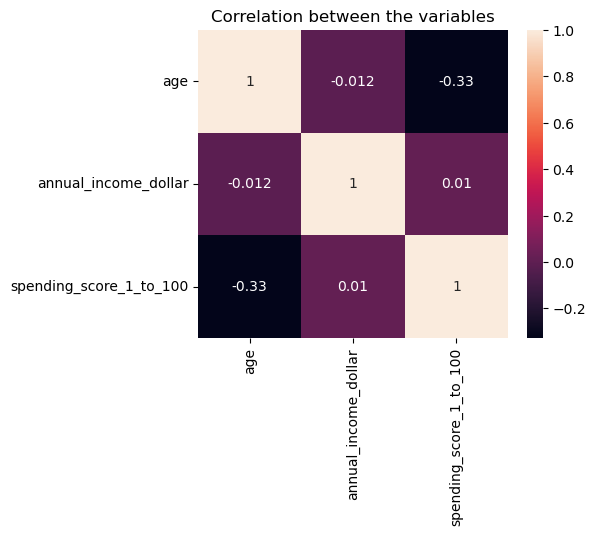

In [378]:
#Looking at the correlation of variable
plt.figure(figsize = (5,4))
sns.heatmap(df[['age', 'annual_income_dollar', 'spending_score_1_to_100']].corr().round(3), annot = True)
plt.title('Correlation between the variables')
plt.show()

# Applying clustering algorithms

## K-means

In [380]:
from sklearn.cluster import KMeans

In [400]:
#Choosing 3 as the k value

In [382]:
km = KMeans(n_clusters = 3, random_state = 18)

In [384]:
df['cluster_km'] = km.fit_predict(df)

C:\Users\WhyWh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


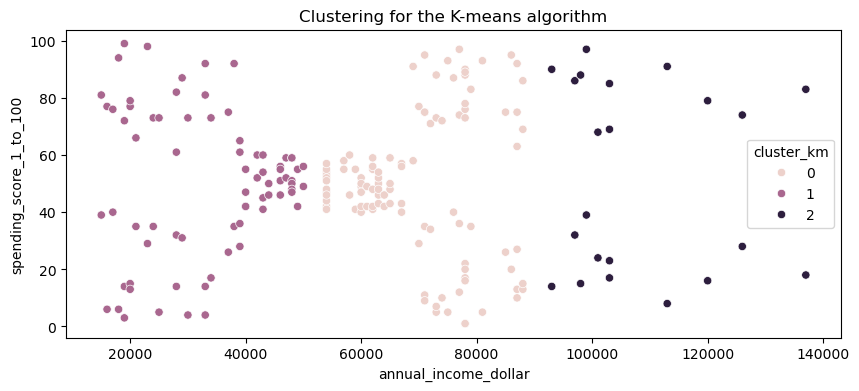

In [386]:
#Visualizing the clustering algorithm K-means' clusters
plt.figure(figsize = (10,4))
plt.title('Clustering for the K-means algorithm')
sns.scatterplot(data = df, x = 'annual_income_dollar', y = 'spending_score_1_to_100', hue = 'cluster_km')
plt.show()

### Elbow method

In [388]:
#Visualizing and plotting the elbow method in order to see any clusters that are seen as optimal

In [293]:
def elbow_method_optimize(df):
    km_ssq = []

    #checking for potential clusters between 1 to 10
    for k in range(1, 10):
        kmn = KMeans(random_state = 18, n_clusters = k)
        kmn.fit(df)
        km_ssq.append(kmn.inertia_)    
    return km_ssq

C:\Users\WhyWh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\WhyWh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\WhyWh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\WhyWh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

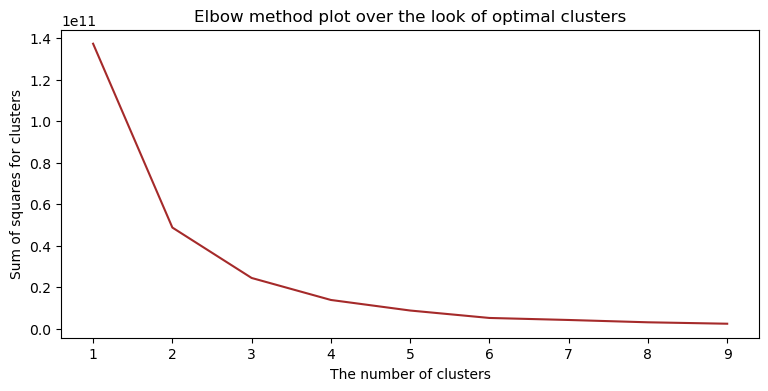

In [390]:
km_ssq = elbow_method_optimize(df)

plt.figure(figsize = (9,4))
plt.title('Elbow method plot over the look of optimal clusters')
sns.lineplot(x = range(1, 10), y = km_ssq, color = 'brown', )
plt.xlabel('The number of clusters')
plt.ylabel('Sum of squares for clusters')
plt.show()

In [392]:
#The lineplot is showing that the number of clusters that are described as optimal out of the bending point are 3 
#within the sum of squares when it comes to clusters. This, because of the lineplot visualizing that the line is 
#decreasing slightly after 3. 

## Agglomerative Clustering

In [402]:
from sklearn.cluster import AgglomerativeClustering

In [404]:
agg = AgglomerativeClustering(linkage = 'ward', n_clusters = 3)

In [406]:
df['cluster_agg'] = agg.fit_predict(df)

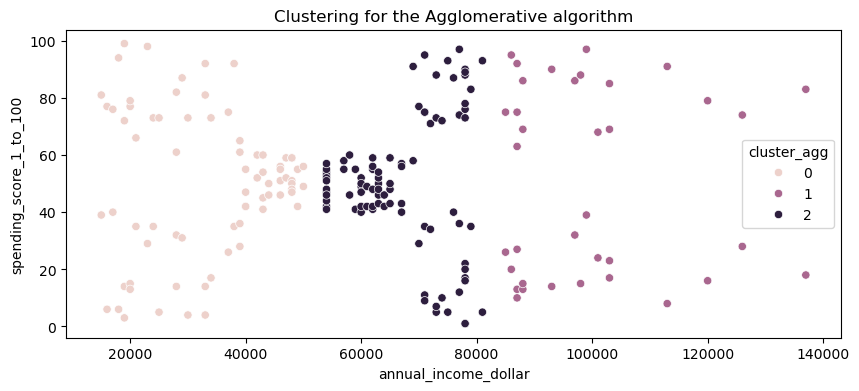

In [408]:
#Visualizing the clustering algorithm Agglomerative Clustering's clusters
plt.figure(figsize = (10,4))
plt.title('Clustering for the Agglomerative algorithm')
sns.scatterplot(data = df, x = 'annual_income_dollar', y = 'spending_score_1_to_100', hue = 'cluster_agg')
plt.show()

## DBSCAN

In [410]:
from sklearn.cluster import DBSCAN

In [412]:
dbs = DBSCAN(min_samples = 5, eps = 15)

In [414]:
df['cluster_dbs'] = dbs.fit_predict(df)

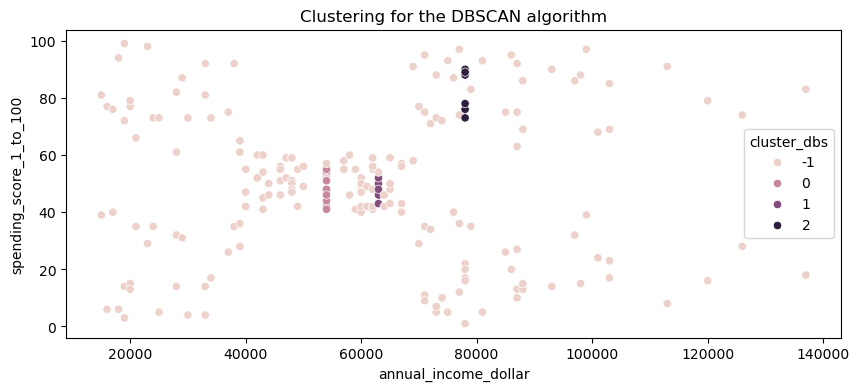

In [418]:
#Visualizing the clustering algorithm DBSCAN's clusters
plt.figure(figsize = (10,4))
plt.title('Clustering for the DBSCAN algorithm')
sns.scatterplot(data = df, x = 'annual_income_dollar', y = 'spending_score_1_to_100', hue = 'cluster_dbs')
plt.show()

# BIRCH

In [420]:
from sklearn.cluster import Birch

In [422]:
bir = Birch(n_clusters = 3, threshold = 0.5)

In [424]:
df['cluster_bir'] = bir.fit_predict(df)

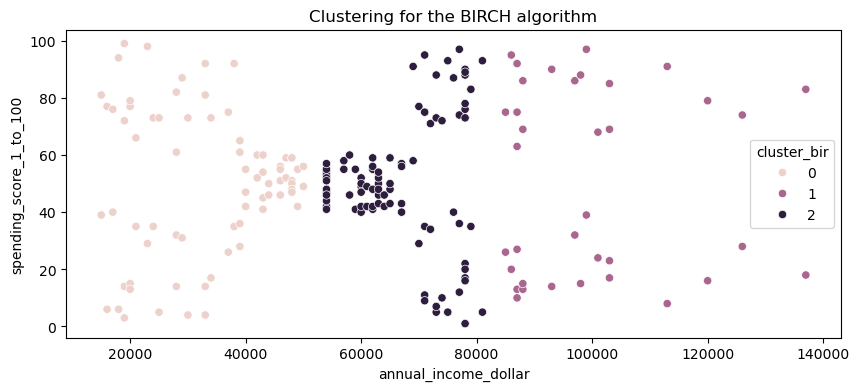

In [426]:
#Visualizing the clustering algorithm BIRCH's clusters
plt.figure(figsize = (10,4))
plt.title('Clustering for the BIRCH algorithm')
sns.scatterplot(data = df, x = 'annual_income_dollar', y = 'spending_score_1_to_100', hue = 'cluster_bir')
plt.show()

## Performance evaluation

In [428]:
#Importing the needed metric silhouette score for evaluation
from sklearn.metrics import silhouette_score

In [430]:
score = silhouette_score(df[['annual_income_dollar', 'spending_score_1_to_100']], df['cluster_bir'])
print(score)

0.5630184704546244


In [434]:
#Showing the silhouette score for each cluster
def show_silhouette_score():
    sil_score_km = silhouette_score(df[['annual_income_dollar', 'spending_score_1_to_100']], df['cluster_km'])
    sil_score_agg = silhouette_score(df[['annual_income_dollar', 'spending_score_1_to_100']], df['cluster_agg'])
    sil_score_dbs = silhouette_score(df[['annual_income_dollar', 'spending_score_1_to_100']], df['cluster_dbs'])
    sil_score_bir = silhouette_score(df[['annual_income_dollar', 'spending_score_1_to_100']], df['cluster_bir'])
    
    print(f'Silhouette score of the K-means algorithm: \n {sil_score_km}')
    print(f'Silhouette score of the Agglomerative Clustering algorithm: \n {sil_score_agg}')
    print(f'Silhouette score of DBSCAN algorithm: \n {sil_score_dbs}')
    print(f'Silhouette score of BIRCH algorithm: \n {sil_score_bir}')

show_silhouette_score()

Silhouette score of the K-means algorithm: 
 0.5704286186213349
Silhouette score of the Agglomerative Clustering algorithm: 
 0.5630184704546244
Silhouette score of DBSCAN algorithm: 
 -0.4453713364363421
Silhouette score of BIRCH algorithm: 
 0.5630184704546244


# Conclusion

Out of the chosen cluster algorithms' results, both strengths and also weaknesses have been shown for each algorithm. From the silhouette score, there are different results from the different clustering algorithms that were used. When the focus is on the K-means algorithm, a score of 0.57 seems to be not great but it is still a score that is seen as moderate, which could be improved. When the focus is on the Agglomerative clustering algorithm, a score of 0.56 seems to be the same where this score is not great but it could still be further improved. When the focus is on the DBSCAN algorithm, a score of -0.45 seems to be bad where a negative score illustrates that the algorithm has performed bad with a bad result. Lastly, when the focus is on the BIRCH algorithm, a score of 0.56 is the same as the agglomerative clustering algorithm where this one also could be further improved and that the result has been decent. 

From these scores of results, three of the clustering algorithms had similar or really close results where K-means performed best out of them. Additionally, from the results it has been shown that the DBSCAN algorithm has performed worst and have gotten a negative result, which also could have been affected by that the dataset that has been used may not be suitable to have the DBSCAN clustering utilized. Based on the use of K-means, it is visible that there is a separation among the clusters that are clear, while the bad side of it is its sensitivity to the outliers in the visualization. Based on the use of Agglomerative clustering, it can handle the structures that are hierarchical, however in the visualization its difficulty for the choice of the correct linkage is visible, where it has shown similar structures of dividing the clusters but not exactly. Compared to the first two, DBSCAN have the possibility when it comes to the identification of outliers, but its weakness of being sensitive regarding choosing parameters has been visible. BIRCH has had similar similar results as the agglomerative clustering, which has shown its efficiency, however, its handling of outliers is a weakness.

For further steps that can be done based on the findings' results is that hyperparameters can be involved and optimize which will improve the clusters' performance. Such hyperparameters can be such as the threshold applied on the BIRCH algorithm or the eps applied on the DBSCAN algorithm because of its negative score. Other evaluations for validation could also be used in order to evaluate the quality of the clusters. Additionally, based on the clusters' it can also be possible to evaluate and visualize the customers' spending amount compared to their income, if such features or information is gathered.